In [197]:
# Unpropagated elements for SARAL satellite

import pandas as pd

file_path = 'C:\\Users\\91701\\Documents\\y2t2\\project\\part a\\satellite_data\\orbital_elements\\unpropagated_elements_SARAL.csv'

df_saral = pd.read_csv(file_path)  
print(df_saral.head())


                            eccentricity  argument of perigee  inclination  \
Unnamed: 0                                                                   
2013-03-10 13:13:33.964320      0.000129             3.342279     1.719596   
2013-03-11 22:45:10.058975      0.000130             3.291112     1.719589   
2013-03-13 01:34:26.835167      0.000151             3.208097     1.719577   
2013-03-14 02:43:30.192095      0.000527             1.514363     1.719552   
2013-03-15 18:57:49.375584      0.000076             2.181199     1.719575   

                            mean anomaly  Brouwer mean motion  right ascension  
Unnamed: 0                                                                      
2013-03-10 13:13:33.964320     -3.340260             0.062543         4.532454  
2013-03-11 22:45:10.058975     -3.289068             0.062543         4.556435  
2013-03-13 01:34:26.835167     -3.206336             0.062543         4.575627  
2013-03-14 02:43:30.192095     -1.510258        

In [366]:
df_saral.describe()

,eccentricity,argument of perigee,inclination,mean anomaly,Brouwer mean motion,right ascension
count,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000,3290.000000
mean,0.000143,1.555963,1.719883,-1.553658,0.062525,3.144041
std,0.000064,0.667961,0.000082,0.667959,0.000005,1.841612
min,0.000002,0.157865,1.719540,-4.476841,0.062519,0.001806
25%,0.000092,0.997294,1.719854,-2.101972,0.062521,1.504751
50%,0.000156,1.552488,1.719875,-1.549967,0.062522,3.146726
75%,0.000196,2.104095,1.719921,-0.994922,0.062531,4.768291
max,0.000527,4.479761,1.720224,-0.155795,0.062543,6.281307


In [198]:
# Manoeuvre file for SARAL

file_path = 'C:\\Users\\91701\\Documents\\y2t2\\project\\part a\\satellite_data\\manoeuvres\\srlman.txt'


def parse_line(line):
    satellite_id = line[0:5].strip()
    start_year = int(line[6:10].strip())
    start_day = int(line[11:14].strip())
    start_hour = int(line[15:17].strip())
    start_minute = int(line[18:20].strip())
    end_year = int(line[21:25].strip())
    end_day = int(line[26:29].strip())
    end_hour = int(line[30:32].strip())
    end_minute = int(line[33:35].strip())
    maneuver_type = line[36:39].strip()
    maneuver_param = line[40:43].strip()
    number_of_burns = int(line[44:45].strip())
    
    burns = []
    for i in range(number_of_burns):
        k = i * 232
        burn_year = int(line[46+k:50+k].strip())
        burn_day = int(line[51+k:54+k].strip())
        burn_hour = int(line[55+k:57+k].strip())
        burn_minute = int(line[58+k:60+k].strip())
        burn_second = float(line[61+k:67+k].strip())
        boost_duration = float(line[68+k:88+k].strip())
        dv1 = float(line[89+k:109+k].strip())
        dv2 = float(line[110+k:130+k].strip())
        dv3 = float(line[131+k:151+k].strip())
        acc1 = float(line[152+k:172+k].strip())
        acc2 = float(line[173+k:193+k].strip())
        acc3 = float(line[194+k:214+k].strip())
        delta_acc1 = float(line[215+k:235+k].strip())
        delta_acc2 = float(line[236+k:256+k].strip())
        delta_acc3 = float(line[257+k:277+k].strip())
        
        burn_data = {
            'satellite_id': satellite_id,
            'start_year': start_year,
            'start_day': start_day,
            'start_hour': start_hour,
            'start_minute': start_minute,
            'end_year': end_year,
            'end_day': end_day,
            'end_hour': end_hour,
            'end_minute': end_minute,
            'maneuver_type': maneuver_type,
            'maneuver_param': maneuver_param,
            'burn_year': burn_year,
            'burn_day': burn_day,
            'burn_hour': burn_hour,
            'burn_minute': burn_minute,
            'burn_second': burn_second,
            'boost_duration': boost_duration,
            'dv1': dv1,
            'dv2': dv2,
            'dv3': dv3,
            'acc1': acc1,
            'acc2': acc2,
            'acc3': acc3,
            'delta_acc1': delta_acc1,
            'delta_acc2': delta_acc2,
            'delta_acc3': delta_acc3
        }
        burns.append(burn_data)
    return burns

def parse_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():  
                burns = parse_line(line)
                start_date = pd.to_datetime(f'{burns[0]["start_year"]}-01-01') + pd.Timedelta(days=burns[0]["start_day"]-1, hours=burns[0]["start_hour"], minutes=burns[0]["start_minute"])
                end_date = pd.to_datetime(f'{burns[0]["end_year"]}-01-01') + pd.Timedelta(days=burns[0]["end_day"]-1, hours=burns[0]["end_hour"], minutes=burns[0]["end_minute"])
                data.append({'Start Date': start_date, 'End Date': end_date})
    return data

data = parse_file(file_path)

man_saral = pd.DataFrame(data)
print(man_saral.head())


           Start Date            End Date
0 2013-02-27 13:14:00 2013-02-27 13:19:00
1 2013-02-27 14:58:00 2013-02-27 15:04:00
2 2013-03-01 15:51:00 2013-03-01 15:53:00
3 2013-03-02 06:03:00 2013-03-02 06:05:00
4 2013-03-03 02:10:00 2013-03-03 02:12:00


In [201]:
#SARAL ARIMA

from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")
df_saral.rename(columns={'Unnamed: 0': 'datetime'}, inplace=True)

# Convert the timestamp column to datetime and set it as index
df_saral['datetime'] = pd.to_datetime(df_saral['datetime'])
df_saral.set_index('datetime', inplace=True)


# Convert all columns to numeric data types
df_saral = df_saral.apply(pd.to_numeric, errors='coerce')

# Ensure no missing values
df_saral.dropna(inplace=True)

# Function to apply ARIMA
def apply_arima(series):
    model = ARIMA(series, order=(1, 1, 1))
    model_fit = model.fit()
    return model_fit

# Apply ARIMA to each column
arima_results = {}
for column in df_saral.columns:
    arima_results[column] = apply_arima(df[column])

for column, result in arima_results.items():
    print(f"ARIMA model summary for {column}:")
    print(result.summary())
    print("\n")


ARIMA model summary for eccentricity:
                               SARIMAX Results                                
Dep. Variable:           eccentricity   No. Observations:                 3290
Model:                 ARIMA(1, 1, 1)   Log Likelihood               32440.534
Date:                Wed, 14 Aug 2024   AIC                         -64875.068
Time:                        15:57:08   BIC                         -64856.773
Sample:                             0   HQIC                        -64868.518
                               - 3290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1333   1.84e-19  -7.26e+17      0.000      -0.133      -0.133
ma.L1         -0.1796   1.73e-19  -1.04e+18      0.000      -0.180      -0.180
sigma2      1.

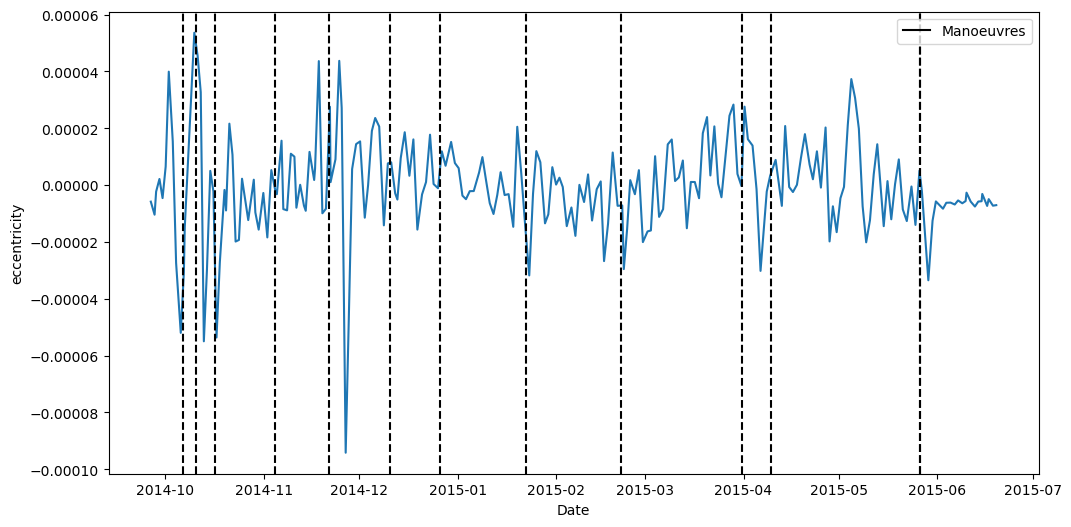

In [456]:
# Eccentricity residual plot

residuals_saral_arima = arima_results['eccentricity'].resid
start =  '2014-09-25'
end = '2015-06-20'

residuals_saral_arima = residuals_saral_arima[(residuals_saral_arima.index >= pd.Timestamp(start)) & (residuals_saral_arima.index < pd.Timestamp(end))]
man_saral = man_saral[(man_saral['Start Date'] >= pd.Timestamp(start)) &(man_saral['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_arima, label='Residuals')
plt.ylabel('eccentricity')
plt.xlabel('Date')

for start_date in man_saral['Start Date']:
    plt.axvline(x=start_date, color='black', linestyle='--')

legend_handles = [plt.plot([], [], color='black',label='Manoeuvres')[0]]
plt.legend(handles=legend_handles)
plt.show()

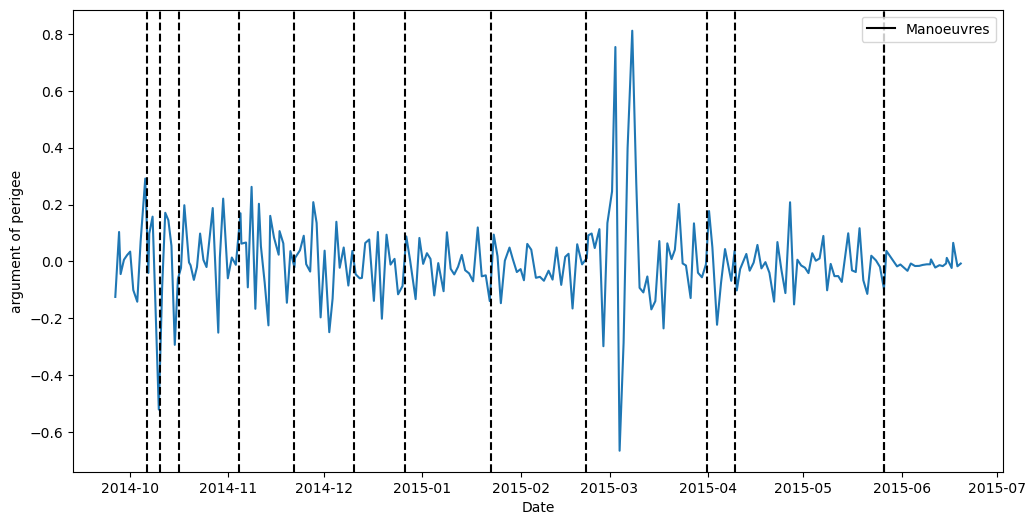

In [457]:
# arguement of perigee residual plot

residuals_saral_arima = arima_results['argument of perigee'].resid
start =  '2014-09-25'
end = '2015-06-20'

residuals_saral_arima = residuals_saral_arima[(residuals_saral_arima.index >= pd.Timestamp(start)) & (residuals_saral_arima.index < pd.Timestamp(end))]
man_saral = man_saral[(man_saral['Start Date'] >= pd.Timestamp(start)) &(man_saral['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_arima, label='Residuals')
plt.ylabel('argument of perigee')
plt.xlabel('Date')

for start_date in man_saral['Start Date']:
    plt.axvline(x=start_date, color='black', linestyle='--')

legend_handles = [plt.plot([], [], color='black',label='Manoeuvres')[0]]
plt.legend(handles=legend_handles)
plt.show()

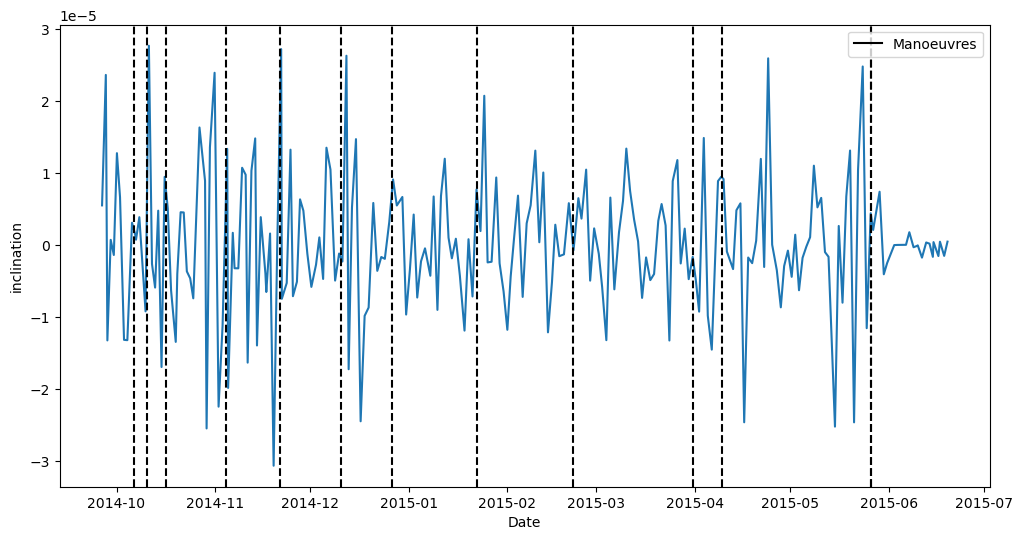

In [458]:
# Inclination residual plot

residuals_saral_arima = arima_results['inclination'].resid
start =  '2014-09-25'
end = '2015-06-20'

residuals_saral_arima = residuals_saral_arima[(residuals_saral_arima.index >= pd.Timestamp(start)) & (residuals_saral_arima.index < pd.Timestamp(end))]
man_saral = man_saral[(man_saral['Start Date'] >= pd.Timestamp(start)) &(man_saral['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_arima, label='Residuals')
plt.ylabel('inclination')
plt.xlabel('Date')

for start_date in man_saral['Start Date']:
    plt.axvline(x=start_date, color='black', linestyle='--')

legend_handles = [plt.plot([], [], color='black',label='Manoeuvres')[0]]
plt.legend(handles=legend_handles)
plt.show()


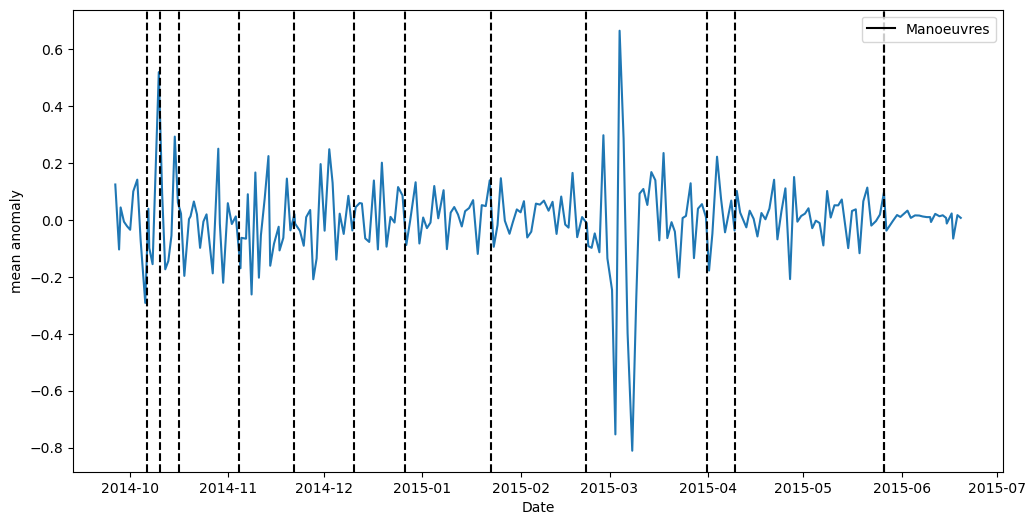

In [459]:
# Mean anomaly residual plot

residuals_saral_arima = arima_results['mean anomaly'].resid
start =  '2014-09-25'
end = '2015-06-20'

residuals_saral_arima = residuals_saral_arima[(residuals_saral_arima.index >= pd.Timestamp(start)) & (residuals_saral_arima.index < pd.Timestamp(end))]
man_saral = man_saral[(man_saral['Start Date'] >= pd.Timestamp(start)) &(man_saral['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_arima, label='Residuals')
plt.ylabel('mean anomaly')
plt.xlabel('Date')

for start_date in man_saral['Start Date']:
    plt.axvline(x=start_date, color='black', linestyle='--')

legend_handles = [plt.plot([], [], color='black',label='Manoeuvres')[0]]
plt.legend(handles=legend_handles)
plt.show()


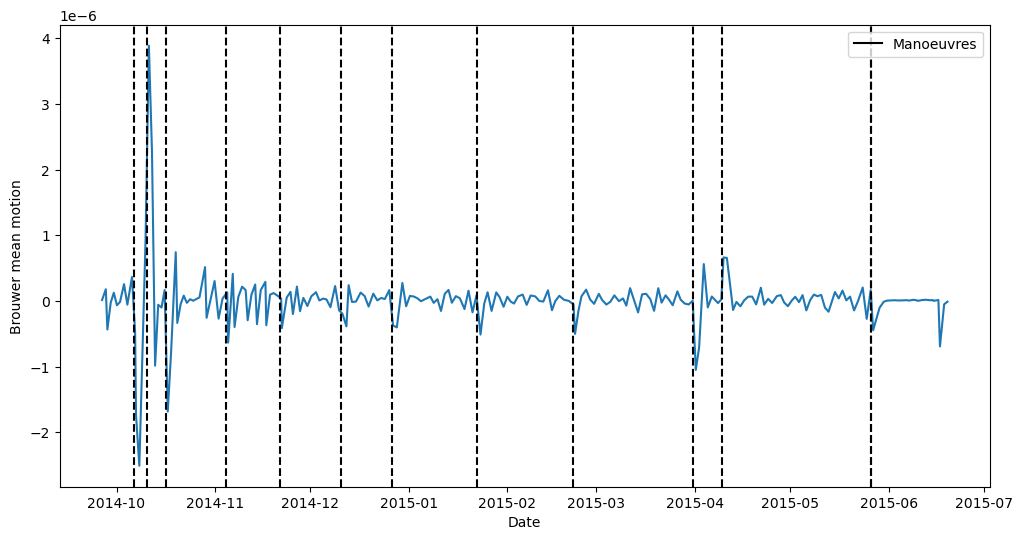

In [460]:
# Brouwer mean motion residual plot

residuals_saral_arima = arima_results['Brouwer mean motion'].resid
start =  '2014-09-25'
end = '2015-06-20'

residuals_saral_arima = residuals_saral_arima[(residuals_saral_arima.index >= pd.Timestamp(start)) & (residuals_saral_arima.index < pd.Timestamp(end))]
man_saral = man_saral[(man_saral['Start Date'] >= pd.Timestamp(start)) &(man_saral['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_arima, label='Residuals')
plt.ylabel('Brouwer mean motion')
plt.xlabel('Date')

for start_date in man_saral['Start Date']:
    plt.axvline(x=start_date, color='black', linestyle='--')

legend_handles = [plt.plot([], [], color='black',label='Manoeuvres')[0]]
plt.legend(handles=legend_handles)
plt.show()


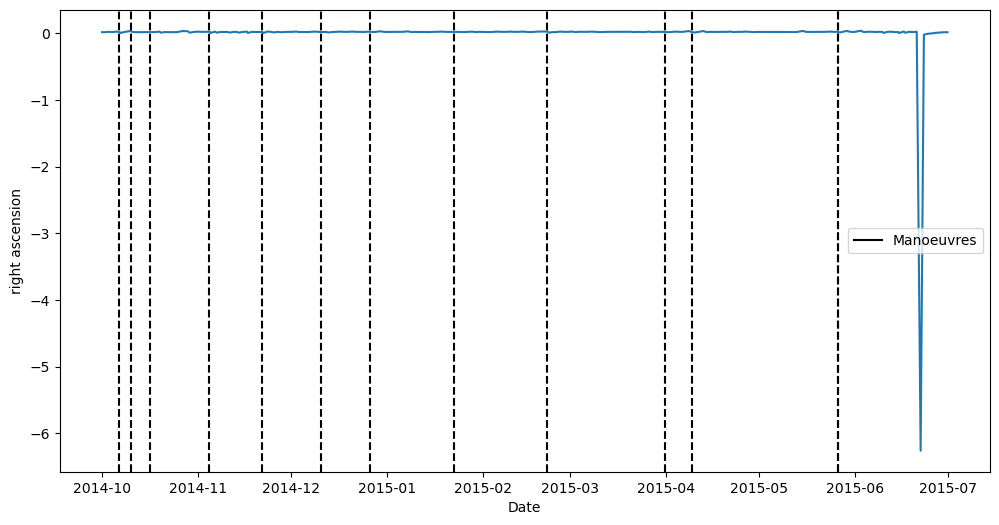

In [461]:
# Right ascension residual plot

residuals_saral_arima = arima_results['right ascension'].resid
start =  '2014-10-01'
end = '2015-07-01'

residuals_saral_arima = residuals_saral_arima[(residuals_saral_arima.index >= pd.Timestamp(start)) & (residuals_saral_arima.index < pd.Timestamp(end))]
man_saral = man_saral[(man_saral['Start Date'] >= pd.Timestamp(start)) &(man_saral['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_arima, label='Residuals')
plt.ylabel('right ascension')
plt.xlabel('Date')

for start_date in man_saral['Start Date']:
    plt.axvline(x=start_date, color='black', linestyle='--')

legend_handles = [plt.plot([], [], color='black',label='Manoeuvres')[0]]
plt.legend(handles=legend_handles)
plt.show()


In [439]:
# Sentinel 6A unpropagated elements

file_path_s6a = 'C:\\Users\\91701\\Documents\\y2t2\\project\\part a\\satellite_data\\orbital_elements\\unpropagated_elements_Sentinel-6A.csv'

df_s6a = pd.read_csv(file_path_s6a)  
print(df_s6a.head())


                   Unnamed: 0  eccentricity  argument of perigee  inclination  \
0  2020-12-05 10:47:44.799647      0.000582             4.521071     1.152715   
1  2020-12-06 03:35:09.704831      0.000583             4.516135     1.152715   
2  2020-12-07 01:58:23.043359      0.000583             4.535687     1.152717   
3  2020-12-08 02:13:32.505312      0.000582             4.518034     1.152711   
4  2020-12-09 08:04:30.230399      0.000582             4.518357     1.152717   

   mean anomaly  Brouwer mean motion  right ascension  
0     -4.520406             0.056154         0.179238  
1     -4.515516             0.056154         0.153622  
2     -4.535093             0.056154         0.119456  
3     -4.517410             0.056154         0.082404  
4     -4.517710             0.056154         0.036849  


In [440]:
df_s6a.describe()

,eccentricity,argument of perigee,inclination,mean anomaly,Brouwer mean motion,right ascension
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,0.000784,4.621659,1.152664,-4.621582,0.055909,3.201560
std,0.000024,0.117674,0.000033,0.117840,0.000024,1.774288
min,0.000575,1.673640,1.152567,-4.879614,0.055904,0.005519
25%,0.000776,4.611174,1.152640,-4.640166,0.055907,1.713881
50%,0.000785,4.627634,1.152663,-4.627447,0.055907,3.216888
75%,0.000795,4.640378,1.152687,-4.611002,0.055907,4.718096
max,0.000910,4.872488,1.152752,-1.670900,0.056154,6.281752


In [466]:
# Manoeuvre file for Sentinel 6a

file_path_man_s6a = 'C:\\Users\\91701\\Documents\\y2t2\\project\\part a\\satellite_data\\manoeuvres\\s6aman.txt'

data = parse_file(file_path_man_s6a)

man_s6a = pd.DataFrame(data)
print(man_s6a)


            Start Date            End Date
0  2020-11-23 02:38:00 2020-11-23 02:38:00
1  2020-11-23 09:50:00 2020-11-23 09:58:00
2  2020-11-24 01:38:00 2020-11-24 01:42:00
3  2020-11-27 05:22:00 2020-11-27 05:25:00
4  2020-12-10 05:01:00 2020-12-10 05:08:00
5  2020-12-14 05:15:00 2020-12-14 05:24:00
6  2020-12-16 06:27:00 2020-12-16 06:28:00
7  2020-12-18 00:38:00 2020-12-18 00:39:00
8  2021-02-18 01:45:00 2021-02-18 01:45:00
9  2021-04-27 07:42:00 2021-04-27 07:50:00
10 2021-04-27 08:10:00 2021-04-27 08:10:00
11 2021-04-29 00:55:00 2021-04-29 00:55:00
12 2021-04-30 10:39:00 2021-04-30 10:39:00
13 2021-08-16 00:21:00 2021-08-16 00:21:00
14 2021-11-25 03:00:00 2021-11-25 03:00:00
15 2022-03-08 03:00:00 2022-03-08 03:00:00
16 2022-06-22 07:30:00 2022-06-22 07:30:00
17 2022-10-13 06:50:00 2022-10-13 06:50:00


In [442]:
# Sentinel 6a ARIMA

warnings.filterwarnings("ignore")
df_s6a.rename(columns={'Unnamed: 0': 'datetime'}, inplace=True)

# Convert the timestamp column to datetime and set it as index
df_s6a['datetime'] = pd.to_datetime(df_s6a['datetime'])
df_s6a.set_index('datetime', inplace=True)


# Convert all columns to numeric data types
df_s6a = df_s6a.apply(pd.to_numeric, errors='coerce')

# Apply ARIMA to each column
s6a_arima_results = {}
for column in df_s6a.columns:
    s6a_arima_results[column] = apply_arima(df_s6a[column])

for column, result in s6a_arima_results.items():
    print(f"ARIMA model summary for {column}:")
    print(result.summary())
    print("\n")


ARIMA model summary for eccentricity:
                               SARIMAX Results                                
Dep. Variable:           eccentricity   No. Observations:                  663
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6574.040
Date:                Thu, 15 Aug 2024   AIC                         -13142.081
Time:                        20:00:16   BIC                         -13128.595
Sample:                             0   HQIC                        -13136.854
                                - 663                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0100      0.000    -20.659      0.000      -0.011      -0.009
ma.L1         -0.2233      0.000   -453.046      0.000      -0.224      -0.222
sigma2      1.

In [452]:
man_s6a

,Start Date,End Date
0,2020-11-23 02:38:00,2020-11-23 02:38:00
1,2020-11-23 09:50:00,2020-11-23 09:58:00
2,2020-11-24 01:38:00,2020-11-24 01:42:00
3,2020-11-27 05:22:00,2020-11-27 05:25:00
4,2020-12-10 05:01:00,2020-12-10 05:08:00
5,2020-12-14 05:15:00,2020-12-14 05:24:00
6,2020-12-16 06:27:00,2020-12-16 06:28:00
7,2020-12-18 00:38:00,2020-12-18 00:39:00
8,2021-02-18 01:45:00,2021-02-18 01:45:00
9,2021-04-27 07:42:00,2021-04-27 07:50:00


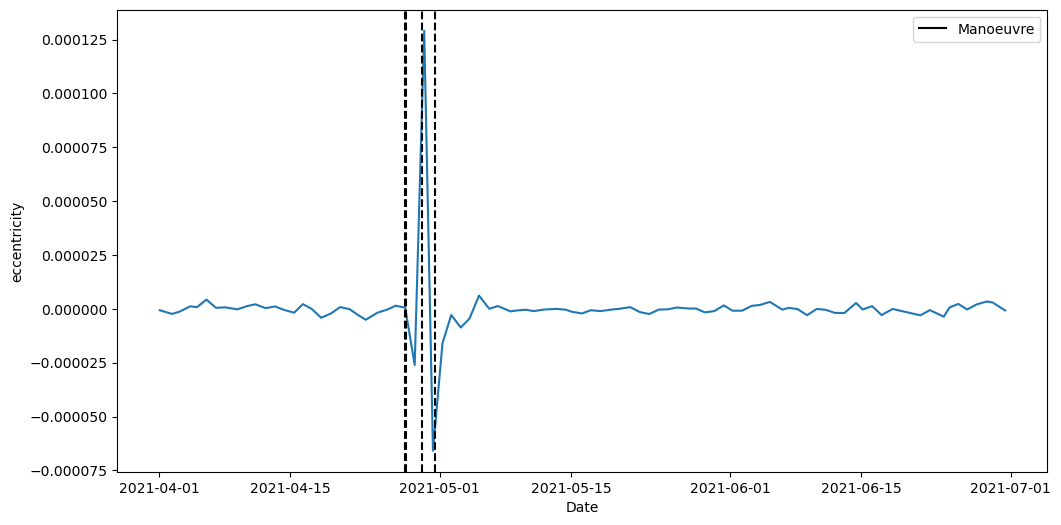

In [470]:
# Eccentricity residual plot

residuals_saral_s6a = s6a_arima_results['eccentricity'].resid

start =  '2021-04-01'
end = '2021-07-01'

residuals_saral_s6a = residuals_saral_s6a[(residuals_saral_s6a.index >= pd.Timestamp(start)) & (residuals_saral_s6a.index < pd.Timestamp(end))]
man_s6a = man_s6a[(man_s6a['Start Date'] >= pd.Timestamp(start)) &(man_s6a['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_s6a, label='Residuals')
plt.ylabel('eccentricity')
plt.xlabel('Date')

for start_date in man_s6a['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




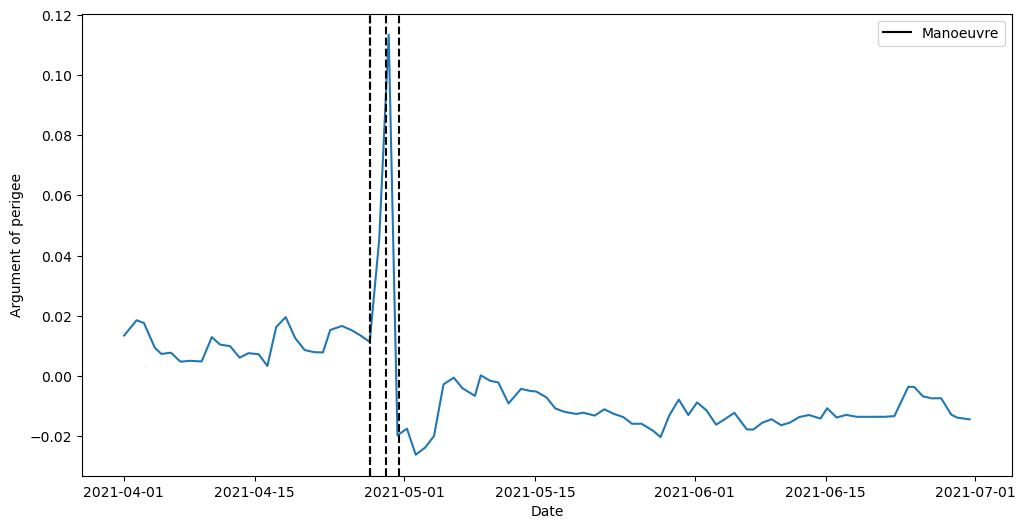

In [474]:
# Arguement of perigee residual plot

residuals_saral_s6a = s6a_arima_results['argument of perigee'].resid
start =  '2021-04-01'
end = '2021-07-01'

residuals_saral_s6a = residuals_saral_s6a[(residuals_saral_s6a.index >= pd.Timestamp(start)) & (residuals_saral_s6a.index < pd.Timestamp(end))]
man_s6a = man_s6a[(man_s6a['Start Date'] >= pd.Timestamp(start)) &(man_s6a['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_s6a, label='Residuals')
plt.ylabel('Argument of perigee')
plt.xlabel('Date')

for start_date in man_s6a['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




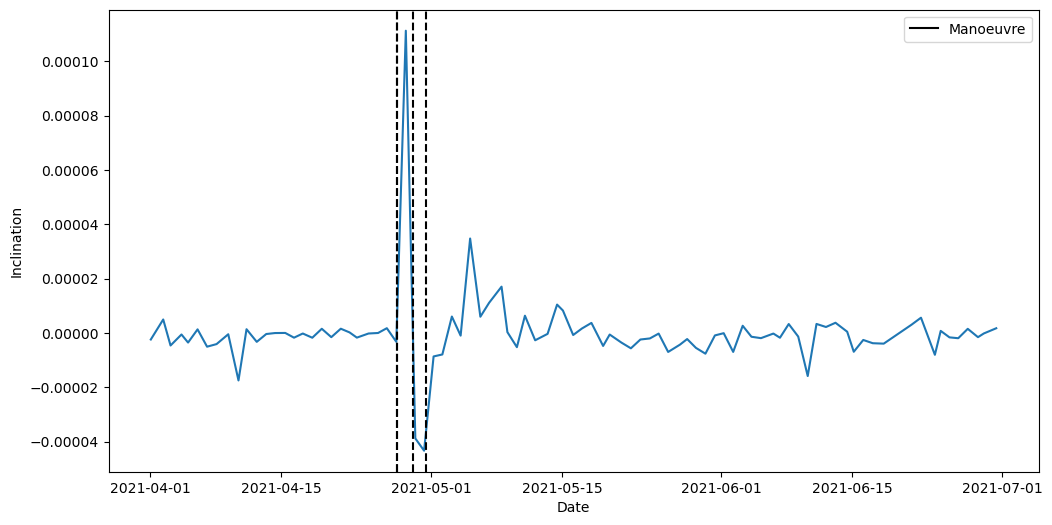

In [475]:
# Inclination residual plot

residuals_saral_s6a = s6a_arima_results['inclination'].resid
start =  '2021-04-01'
end = '2021-07-01'

residuals_saral_s6a = residuals_saral_s6a[(residuals_saral_s6a.index >= pd.Timestamp(start)) & (residuals_saral_s6a.index < pd.Timestamp(end))]
man_s6a = man_s6a[(man_s6a['Start Date'] >= pd.Timestamp(start)) &(man_s6a['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_s6a, label='Residuals')
plt.ylabel('Inclination')
plt.xlabel('Date')

for start_date in man_s6a['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




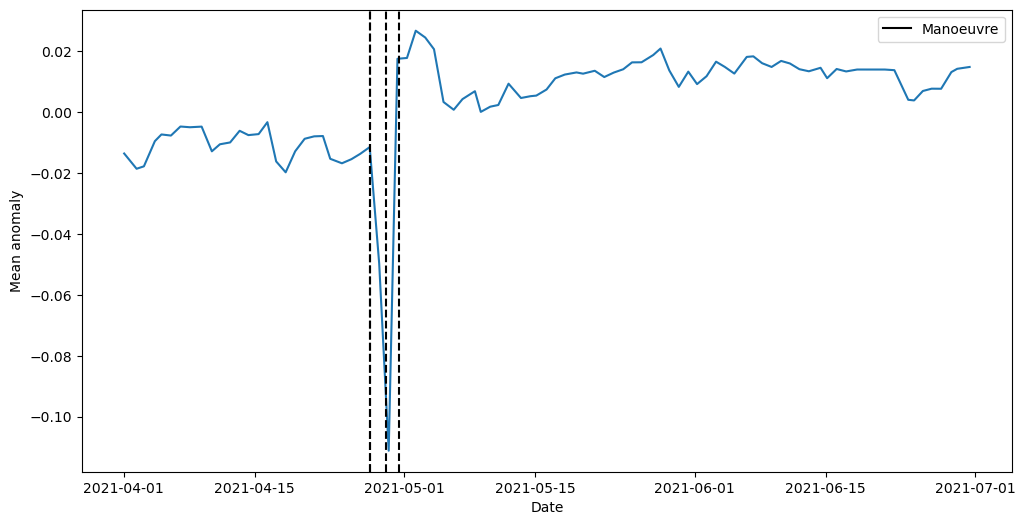

In [476]:
# Mean anomaly residual plot

residuals_saral_s6a = s6a_arima_results['mean anomaly'].resid
start =  '2021-04-01'
end = '2021-07-01'

residuals_saral_s6a = residuals_saral_s6a[(residuals_saral_s6a.index >= pd.Timestamp(start)) & (residuals_saral_s6a.index < pd.Timestamp(end))]
man_s6a = man_s6a[(man_s6a['Start Date'] >= pd.Timestamp(start)) &(man_s6a['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_s6a, label='Residuals')
plt.ylabel('Mean anomaly')
plt.xlabel('Date')

for start_date in man_s6a['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




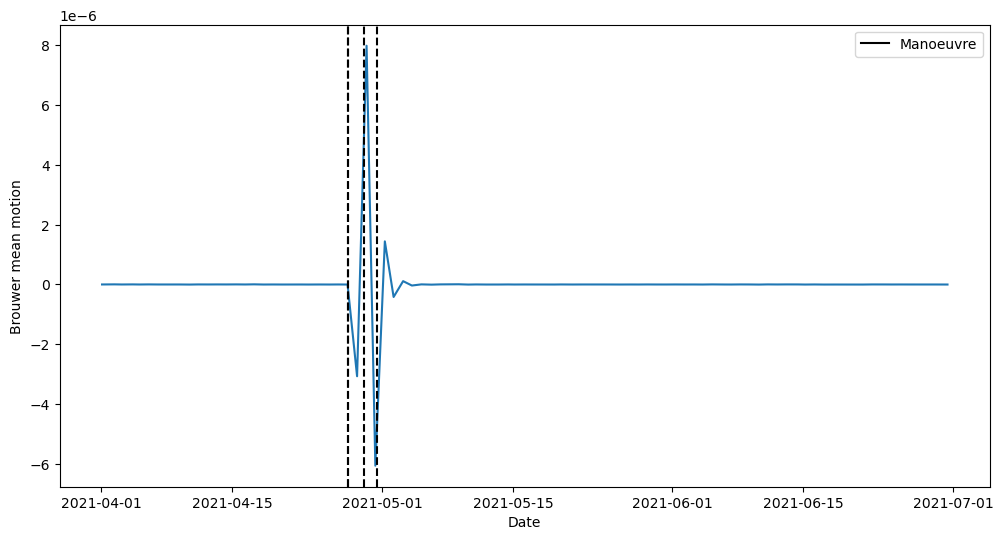

In [477]:
# Brouwer mean motion residual plot

residuals_saral_s6a_bmm = s6a_arima_results['Brouwer mean motion'].resid
start =  '2021-04-01'
end = '2021-07-01'

residuals_saral_s6a_bmm = residuals_saral_s6a_bmm[(residuals_saral_s6a_bmm.index >= pd.Timestamp(start)) & (residuals_saral_s6a_bmm.index < pd.Timestamp(end))]
man_s6a = man_s6a[(man_s6a['Start Date'] >= pd.Timestamp(start)) &(man_s6a['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_s6a_bmm, label='Residuals')
plt.ylabel('Brouwer mean motion')
plt.xlabel('Date')

for start_date in man_s6a['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




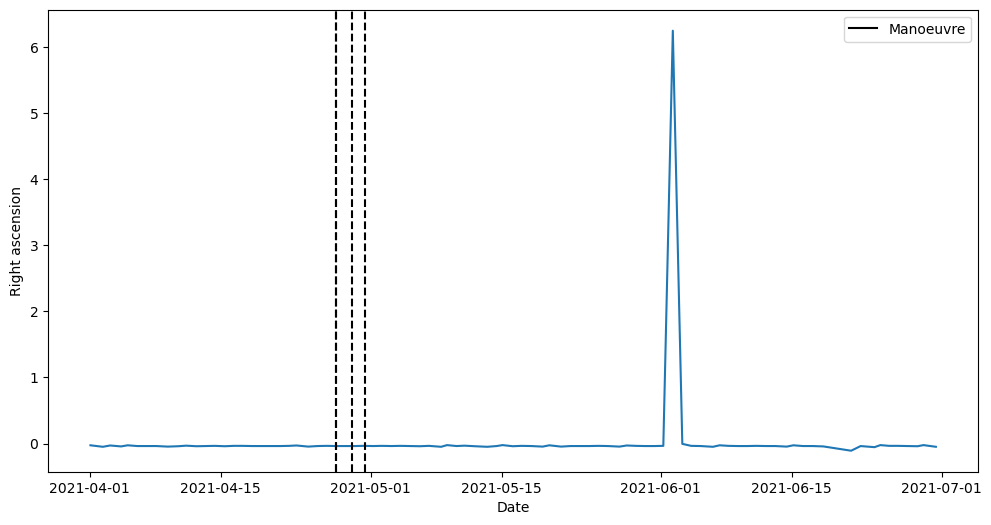

In [478]:
# Right ascension residual plot

residuals_saral_s6a = s6a_arima_results['right ascension'].resid
start =  '2021-04-01'
end = '2021-07-01'

residuals_saral_s6a = residuals_saral_s6a[(residuals_saral_s6a.index >= pd.Timestamp(start)) & (residuals_saral_s6a.index < pd.Timestamp(end))]
man_s6a = man_s6a[(man_s6a['Start Date'] >= pd.Timestamp(start)) &(man_s6a['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_s6a, label='Residuals')
plt.ylabel('Right ascension')
plt.xlabel('Date')

for start_date in man_s6a['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




In [189]:
# CryoSat 2 unpropogated elements

file_path_cs2 = 'C:\\Users\\91701\\Documents\\y2t2\\project\\part a\\satellite_data\\orbital_elements\\unpropagated_elements_CryoSat-2.csv'

df_cs2 = pd.read_csv(file_path_cs2) 
print(df_cs2.head())


                   Unnamed: 0  eccentricity  argument of perigee  inclination  \
0  2010-04-25 12:13:31.467936      0.001190             3.773156     1.606104   
1  2010-04-26 13:01:57.579456      0.001207             3.697660     1.606110   
2  2010-04-27 22:06:32.422176      0.001224             3.603564     1.606097   
3  2010-04-28 12:59:36.035519      0.001233             3.566036     1.606094   
4  2010-04-29 00:34:12.213407      0.001252             3.529150     1.606097   

   mean anomaly  Brouwer mean motion  right ascension  
0     -3.772437             0.063403         5.077397  
1     -3.696826             0.063403         5.081760  
2     -3.602503             0.063403         5.087575  
3     -3.564917             0.063403         5.090192  
4     -3.527920             0.063403         5.092225  


In [417]:
df_cs2.describe()

,eccentricity,argument of perigee,inclination,mean anomaly,Brouwer mean motion,right ascension
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,0.000823,2.812684,1.606134,-2.818992,0.063402,3.142978
std,0.000233,1.789181,0.000105,1.806961,0.000005,1.816013
min,0.000224,0.003416,1.605876,-6.279445,0.063392,0.001339
25%,0.000650,1.310100,1.606066,-4.303682,0.063404,1.567736
50%,0.000821,2.537463,1.606134,-2.534661,0.063404,3.121135
75%,0.000981,4.249389,1.606216,-1.293878,0.063405,4.756874
max,0.001520,6.281550,1.606350,-0.001040,0.063411,6.281080


In [190]:
# Manoeuvre for CryoSat 2

file_path_man_cs2 = 'C:\\Users\\91701\\Documents\\y2t2\\project\\part a\\satellite_data\\manoeuvres\\cs2man.txt'
data = parse_file(file_path_man_cs2)

man_cs2 = pd.DataFrame(data)
print(man_cs2)


             Start Date            End Date
0   2010-04-15 17:47:00 2010-04-15 17:48:00
1   2010-05-03 17:55:00 2010-05-04 00:35:00
2   2010-05-04 18:38:00 2010-05-04 18:48:00
3   2010-05-05 17:44:00 2010-05-05 17:59:00
4   2010-05-06 18:26:00 2010-05-06 18:51:00
..                  ...                 ...
163 2022-08-03 17:18:00 2022-08-03 17:20:00
164 2022-09-01 17:13:00 2022-09-01 17:14:00
165 2022-09-29 16:20:00 2022-09-29 16:22:00
166 2022-10-02 19:36:00 2022-10-02 19:38:00
167 2022-10-05 19:26:00 2022-10-05 19:29:00

[168 rows x 2 columns]


In [256]:
# CryoSat 2 ARIMA

warnings.filterwarnings("ignore")
df_cs2.rename(columns={'Unnamed: 0': 'datetime'}, inplace=True)

# Convert the timestamp column to datetime and set it as index
df_cs2['datetime'] = pd.to_datetime(df_cs2['datetime'])
df_cs2.set_index('datetime', inplace=True)


# Convert all columns to numeric data types
df_cs2 = df_cs2.apply(pd.to_numeric, errors='coerce')

# Ensure no missing values
df_cs2.dropna(inplace=True)

# Apply ARIMA to each column
cs2_arima_results = {}
for column in df_cs2.columns:
    cs2_arima_results[column] = apply_arima(df_cs2[column])

# Display a summary for each column's ARIMA model
for column, result in cs2_arima_results.items():
    print(f"ARIMA model summary for {column}:")
    print(result.summary())
    print("\n")


ARIMA model summary for eccentricity:
                               SARIMAX Results                                
Dep. Variable:           eccentricity   No. Observations:                 4308
Model:                 ARIMA(1, 1, 1)   Log Likelihood               39729.903
Date:                Thu, 15 Aug 2024   AIC                         -79453.806
Time:                        16:09:28   BIC                         -79434.702
Sample:                             0   HQIC                        -79447.059
                               - 4308                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0   3.21e-20          0      1.000    -6.3e-20     6.3e-20
ma.L1         -0.9820   3.06e-20  -3.21e+19      0.000      -0.982      -0.982
sigma2        

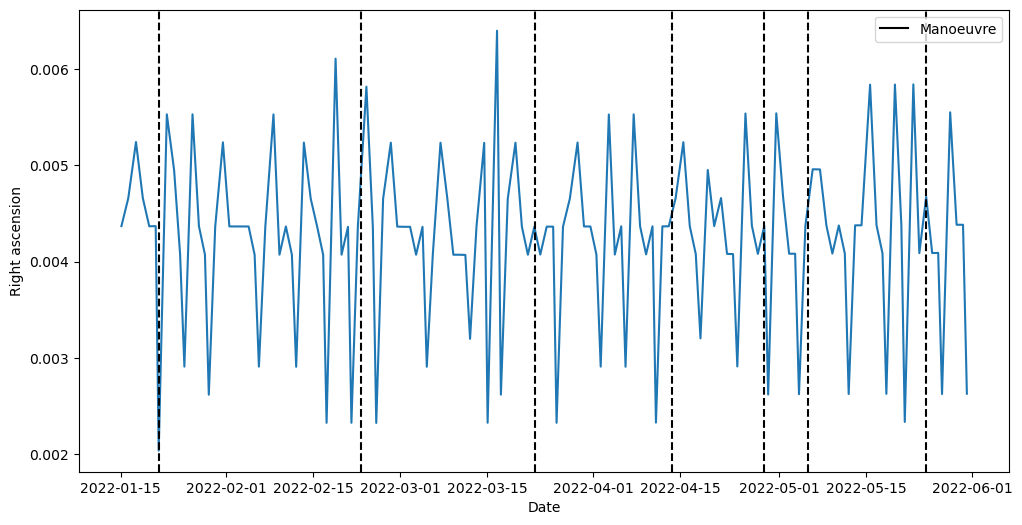

In [479]:
# Right Ascension Residual plot

residuals_saral_scs2 = cs2_arima_results['right ascension'].resid
start =  '2022-01-15'
end = '2022-06-01'

residuals_saral_scs2 = residuals_saral_scs2[(residuals_saral_scs2.index >= pd.Timestamp(start)) & (residuals_saral_scs2.index < pd.Timestamp(end))]
man_cs2 = man_cs2[(man_cs2['Start Date'] >= pd.Timestamp(start)) &(man_cs2['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_scs2, label='Residuals')
plt.ylabel('Right ascension')
plt.xlabel('Date')

for start_date in man_cs2['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




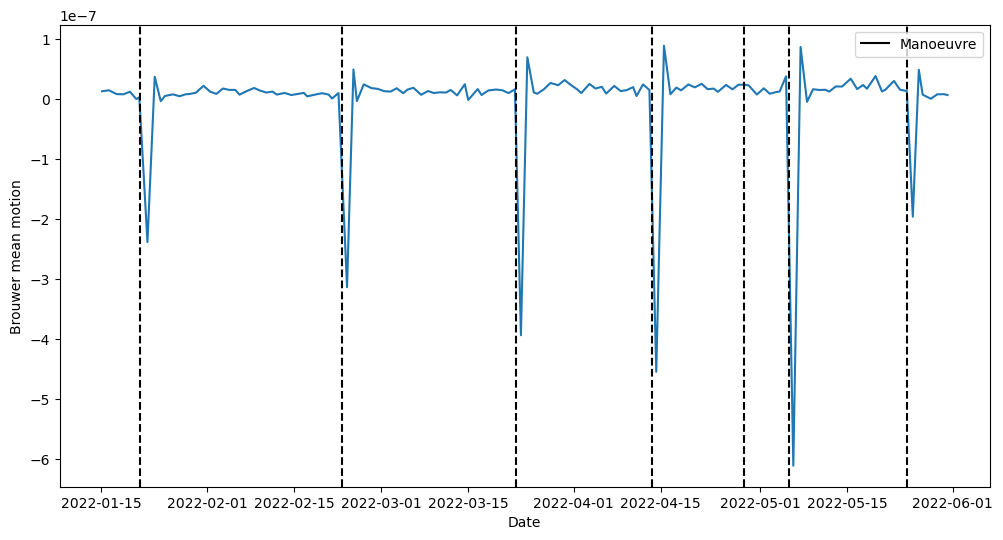

In [480]:
# Brouwer mean motion Residual plot

residuals_saral_scs2 = cs2_arima_results['Brouwer mean motion'].resid
start =  '2022-01-15'
end = '2022-06-01'

residuals_saral_scs2 = residuals_saral_scs2[(residuals_saral_scs2.index >= pd.Timestamp(start)) & (residuals_saral_scs2.index < pd.Timestamp(end))]
man_cs2 = man_cs2[(man_cs2['Start Date'] >= pd.Timestamp(start)) &(man_cs2['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_scs2, label='Residuals')
plt.ylabel('Brouwer mean motion')
plt.xlabel('Date')

for start_date in man_cs2['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




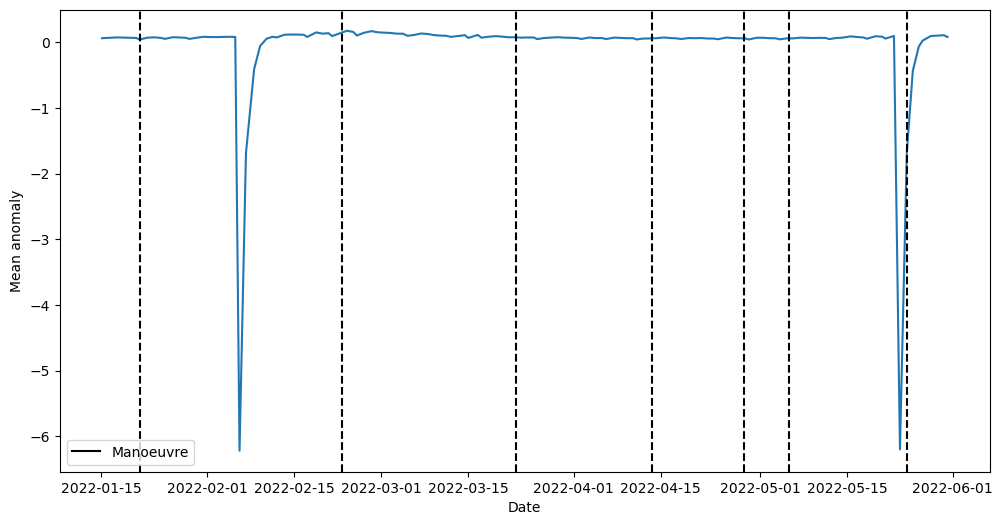

In [481]:
# Mean anomaly residual plot

residuals_saral_scs2 = cs2_arima_results['mean anomaly'].resid
start =  '2022-01-15'
end = '2022-06-01'

residuals_saral_scs2 = residuals_saral_scs2[(residuals_saral_scs2.index >= pd.Timestamp(start)) & (residuals_saral_scs2.index < pd.Timestamp(end))]
man_cs2 = man_cs2[(man_cs2['Start Date'] >= pd.Timestamp(start)) &(man_cs2['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_scs2, label='Residuals')
plt.ylabel('Mean anomaly')
plt.xlabel('Date')

for start_date in man_cs2['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




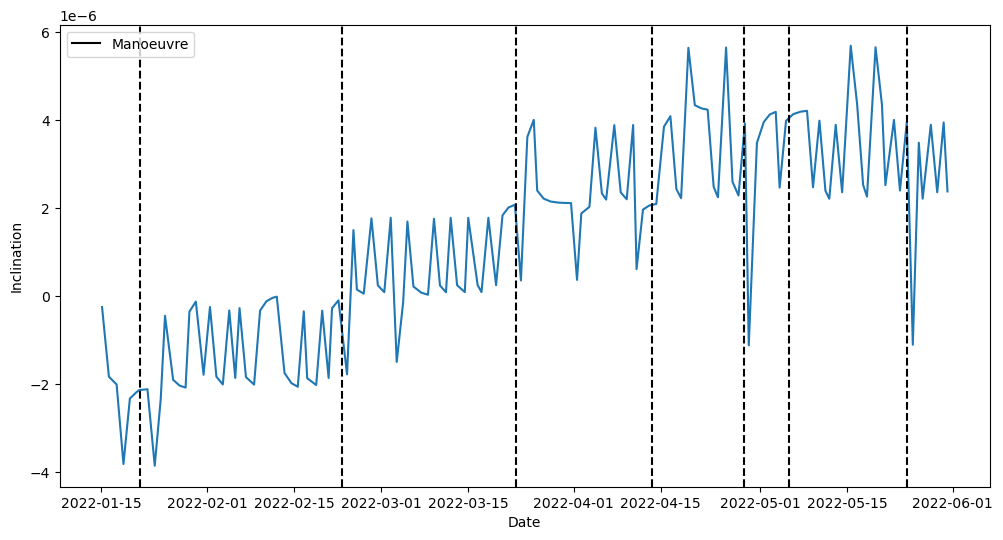

In [482]:
# Inclination residual plot

residuals_saral_scs2 = cs2_arima_results['inclination'].resid
start =  '2022-01-15'
end = '2022-06-01'

residuals_saral_scs2 = residuals_saral_scs2[(residuals_saral_scs2.index >= pd.Timestamp(start)) & (residuals_saral_scs2.index < pd.Timestamp(end))]
man_cs2 = man_cs2[(man_cs2['Start Date'] >= pd.Timestamp(start)) &(man_cs2['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_scs2, label='Residuals')
plt.ylabel('Inclination')
plt.xlabel('Date')

for start_date in man_cs2['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




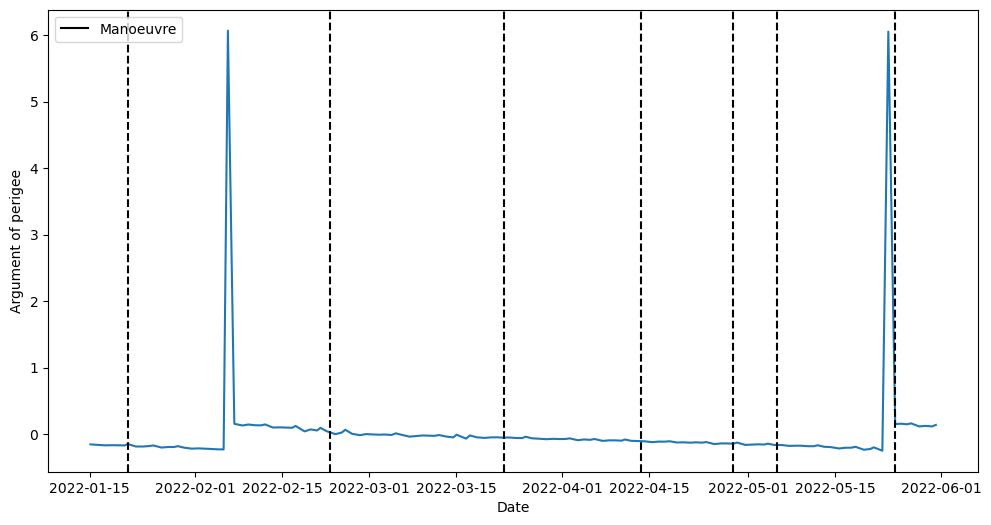

In [483]:
# Arguement of perigee residual plot

residuals_saral_scs2 = cs2_arima_results['argument of perigee'].resid
start =  '2022-01-15'
end = '2022-06-01'

residuals_saral_scs2 = residuals_saral_scs2[(residuals_saral_scs2.index >= pd.Timestamp(start)) & (residuals_saral_scs2.index < pd.Timestamp(end))]
man_cs2 = man_cs2[(man_cs2['Start Date'] >= pd.Timestamp(start)) &(man_cs2['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_scs2, label='Residuals')
plt.ylabel('Argument of perigee')
plt.xlabel('Date')

for start_date in man_cs2['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()




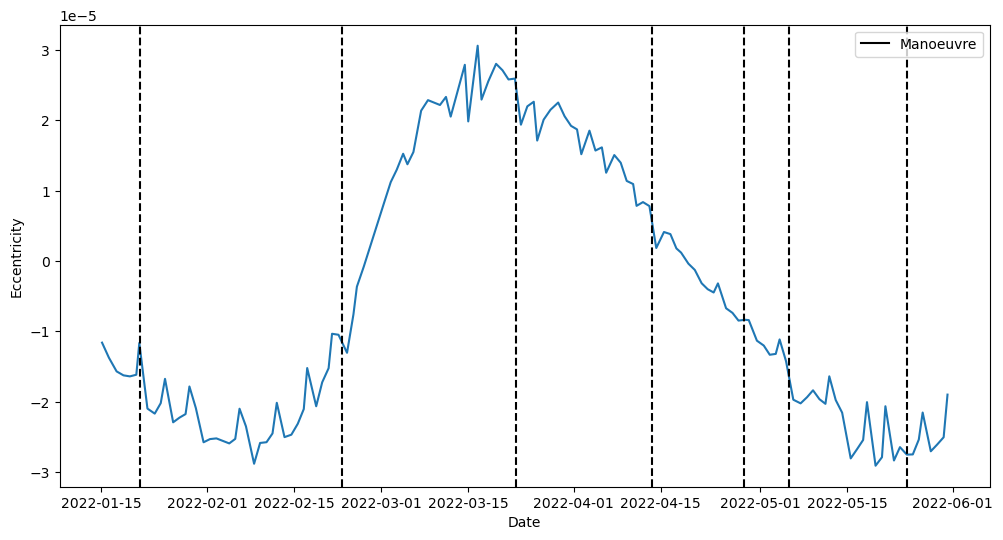

In [484]:
# Eccentricity residual plot

residuals_saral_scs2 = cs2_arima_results['eccentricity'].resid
start =  '2022-01-15'
end = '2022-06-01'

residuals_saral_scs2 = residuals_saral_scs2[(residuals_saral_scs2.index >= pd.Timestamp(start)) & (residuals_saral_scs2.index < pd.Timestamp(end))]
man_cs2 = man_cs2[(man_cs2['Start Date'] >= pd.Timestamp(start)) &(man_cs2['Start Date'] < pd.Timestamp(end))]

plt.figure(figsize=(12, 6))
plt.plot(residuals_saral_scs2, label='Residuals')
plt.ylabel('Eccentricity')
plt.xlabel('Date')

for start_date in man_cs2['Start Date']:
    plt.axvline(x=start_date, color = 'black', linestyle='--')

legend_handles = [plt.plot([], [], color = 'black', label='Manoeuvre')[0]]
plt.legend(handles=legend_handles)
plt.show()


